# 1. Perkenalan
1. Nama : Cindra Chatami
2. Batch : 9 FTDS

Dataset yang digunakan didapatkan dari [Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). Data ini merupakan observasi cuaca selama 10 tahun yang berlokasi di Australia. Dengan dataset ini, saya akan membuat model untuk memprediksi turunnya hujan dihari esok (hujan / tidak hujan). Model yang digunakan adalah **Logistic Regression & LinearSVC** dengan hyperparameter terbaiknya. Aakan dilakukan komprasi antara 2 model agar mendapatkan model terbaik untuk memprediksi cuaca besok


# 2. Import Library

In [1]:
#untuk EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#untuk preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler


#untuk model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  LinearSVC
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore")


# 3. Data Loading

In [2]:
df = pd.read_csv('weatherAUS.csv')

Melihat jumlah entri data, nama kolom, dan tipe dari kolom.

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

> Dataset ini memiliki 145460 Entri . Banyak dari kolom pada dataset ini memiliki missing value (value yang hilang) kecuali pada kolom Date & Location. Karena merupakan observasi cauca, mayoritas dari kolom ini memiliki tipe float (angka).

In [4]:
pd.set_option('display.max_columns', None)
#konfigurasi agar dapat melihat semua kolom

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


- mintemp & maxtemp : The minimum & max temperature in degrees celsius
- Rainfall : The amount of rainfall recorded for the day in mm
- Evaporation : The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine : The number of hours of bright sunshine in the day 
- windgustdir : The direction of the strongest wind gust in the 24 hours to midnight
- windgustspeed : The speed (km/h) of the strongest wind gust in the 24 hours to midnight

In [6]:
#melihat penjelasan numeric data secara singkat
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.columns = df.columns.str.lower() #merubah semua kolom menjadi lowercase

# 4. EDA

In [8]:
#merubah format kolom 'date' dari object menjadi datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

#merubah kolom raintomorrow menjadi int (1 untuk hujan dan  0 untuk tidak hujan)
#hal ini perlu dilakukan agar model dapat dilatih & melihat korelasi dari feature yang ada pada dataset
df['raintomorrow'] = (df['raintomorrow'] == 'Yes').astype(int)
df['raintoday'] = (df['raintoday'] == 'Yes').astype(int)

#melakukan compose pada kolom date menjadi kolom hari dan bulan
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df = df.astype({"month": str})

> Hujan = 1 
----
> Tidak Hujan = 0

In [9]:
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,day,month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,1,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,3,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,4,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,5,12


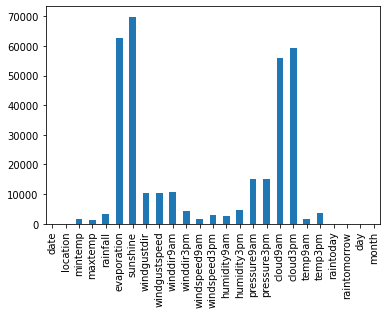

In [10]:
#visualisasi missing value
df.isnull().sum().plot.bar()
plt.show()


In [11]:
pd.DataFrame({'missingvalue': df.isnull().sum()}).T


,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,day,month
missingvalue,0,0,1485,1261,3261,62790,69835,10326,10263,10566,4228,1767,3062,2654,4507,15065,15028,55888,59358,1767,3609,0,0,0,0


> Missing value terbanyak berada pada kolom sunshine (69.835 data), evaporasi (52.790 data), cloud3pm (59.358 data), dan cloud9am(55.888 data)

In [12]:
#menghitung jumlah data prediksi hujan besok
print('\njumlah hujan besok\n', df["raintomorrow"].value_counts())



jumlah hujan besok
 0    113583
1     31877
Name: raintomorrow, dtype: int64


> Data antara hujan dan tidak hujan tidak imbang, lebih banyak prediksi mengatakan tidak hujan

## Korelasi Feature Dengan Label

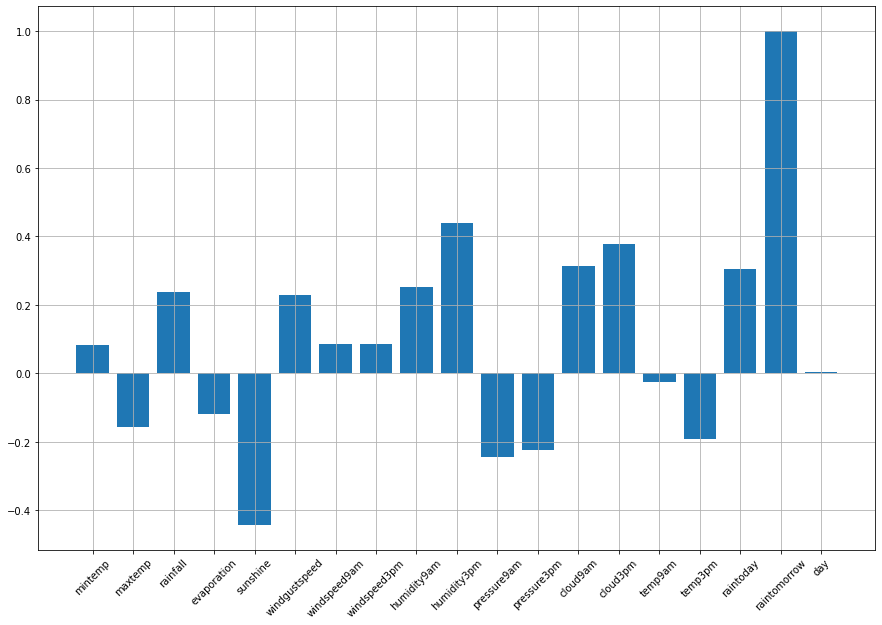

In [13]:
plt.subplots(figsize=(15, 10))
_corr = df.corr()
plt.bar(_corr.columns, df.corr()['raintomorrow'])
plt.xticks(rotation=45)
plt.grid()


Berdasarkan histogram korelasi tersebut, kolom yang mempengaruhi prediksi raintomorrow adalah data yang histogramnya tinggi (baik nilainya positif maupun negatif). Bisa dibilang nyaris semua kolom berkorelasi kecuali day, month, dan cloud3pm. Namun hal itu perlu diteliti lebih jauh

## Korelasi Antar Feature

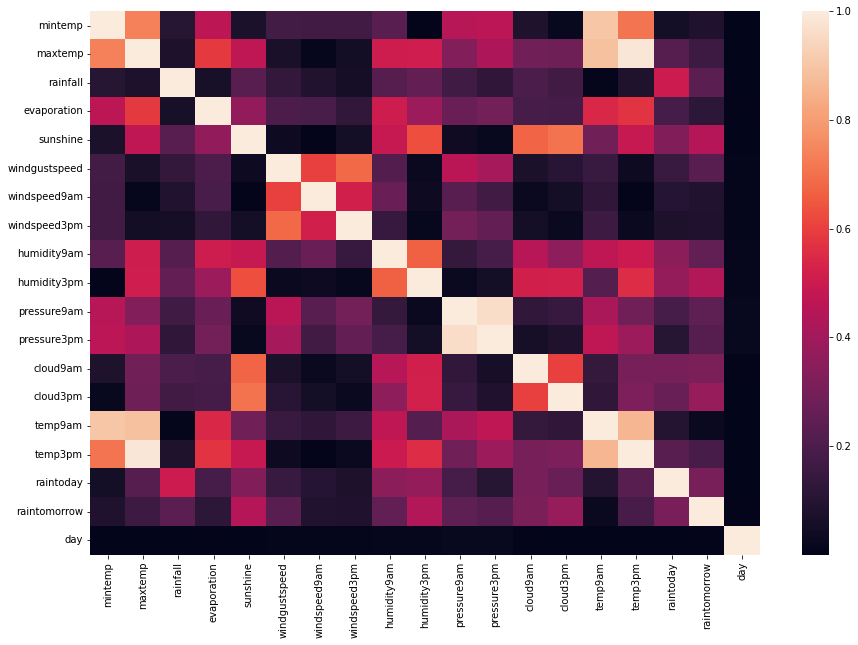

In [14]:
#melihat korelasi numeric antar feature
plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr().abs())


Berdasarkan heatmap, kolom2 yang memiliki korelasi tinggi antar feature adalah : 
- mintemp korelatif dengan temp9am, temp3pm
- setiap kolom cuaca jam 9 berkorelasi dengan jam 3 siang
- windgustspeed korelatif dengan windspeed 9am dan wndspeed 3pm
- kolom pressure 9am dan 3pm memiliki tingkat korelasi yang sangat tinggi
Berarti semakin antar kolom berkorelasi, maka mereka menampilkan informasi yang sama. Pressure pukul 9pagi dengan 3sore menampilkan informasi yang sama.

Kolom yang tidak memiliki korelasi 1 sama lain : sunshine, evaporation

## Korelasi Bulan (kalender) Dengan Prediksi Hujan

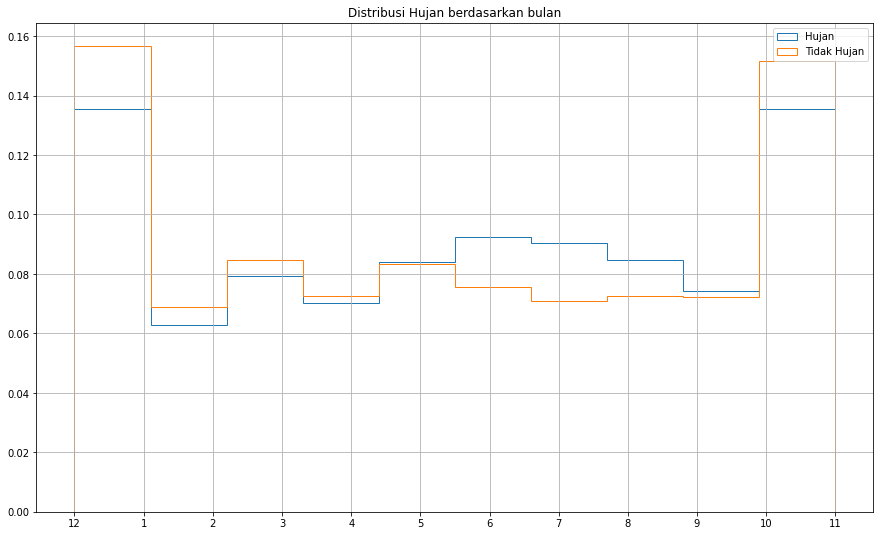

In [15]:
plt.figure(figsize=(15,9))
plt.hist(df[df['raintomorrow'] == 1].month,
         histtype='step', label='Hujan', density=True)
plt.hist(df[df['raintomorrow'] == 0].month,
         histtype='step', label='Tidak Hujan', density=True)
plt.title('Distribusi Hujan berdasarkan bulan')
plt.legend()
plt.grid()


> Dilihat dari plotnya, bulan 5 - 8 memiliki kemungkinan hujan lebih tinggi. Hal ini merupakan hal yang masuk akal karena ada beberapa musim di Australia. Dan musim pada bulan 5-8 adalah musim dengan kemungkinan hujan yang tinggi

## Korelasi Arah Mata Angin Dengan Prediksi Hujan

Text(0.5, 1.0, 'Distribusi Hujan berdasarkan arah mata angin')

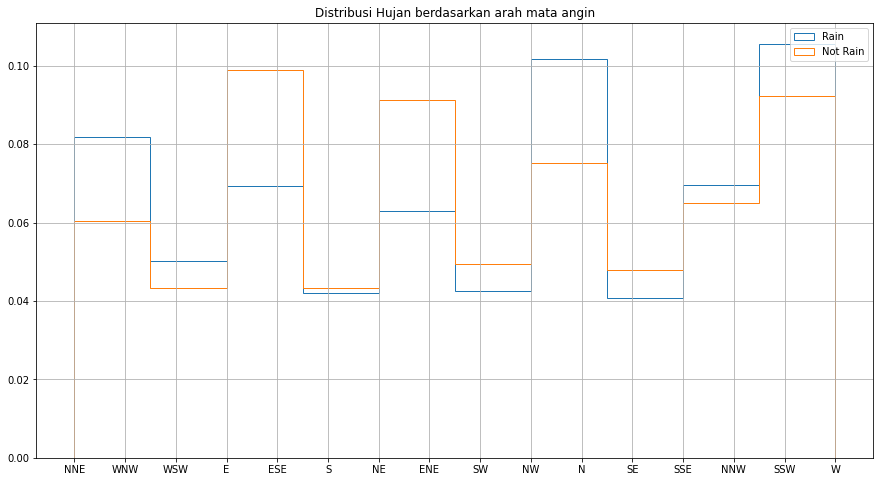

In [16]:
_df = df.dropna() #data missing value di drop agar dapat melihat plot histogram
plt.figure(figsize=(15,8))
plt.hist(_df[_df['raintomorrow'] == 1].windgustdir,
         histtype='step', label='Rain', density=True)
plt.hist(_df[_df['raintomorrow'] == 0].windgustdir,
         histtype='step', label='Not Rain', density=True)
plt.legend()
plt.grid()
plt.title('Distribusi Hujan berdasarkan arah mata angin')


> Berdasarkan histogram tersebut dapat kita lihat bahwa ada beberapa arah mata angin yang prediksi hujan nya lebih tinggi seperti NNE, WNW,WSW, N, NNW, dan W

## Korelasi Hujan Hari Ini Dengan Prediksi Hujan Besok

Text(0.5, 1.0, 'Distribusi Hujan berdasarkan arah mata angin')

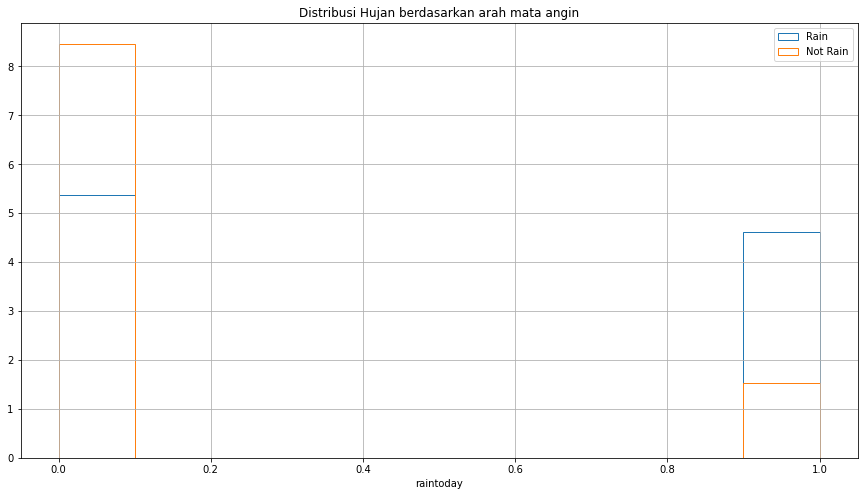

In [17]:
plt.figure(figsize=(15,8))
plt.hist(_df[_df['raintomorrow'] == 1].raintoday,
         histtype='step', label='Rain', density=True)
plt.hist(_df[_df['raintomorrow'] == 0].raintoday,
         histtype='step', label='Not Rain', density=True)
plt.xlabel('raintoday')
plt.legend()
plt.grid()
plt.title('Distribusi Hujan berdasarkan arah mata angin')


> Jika hari ini hujan, maka kemungkinan besok akan hujan lebih besar

## Korelasi Temperature Terendah Dengan Prediksi Hujan

Text(0.5, 1.0, 'Distribusi Hujan Berdasarkan Temperature Minimal')

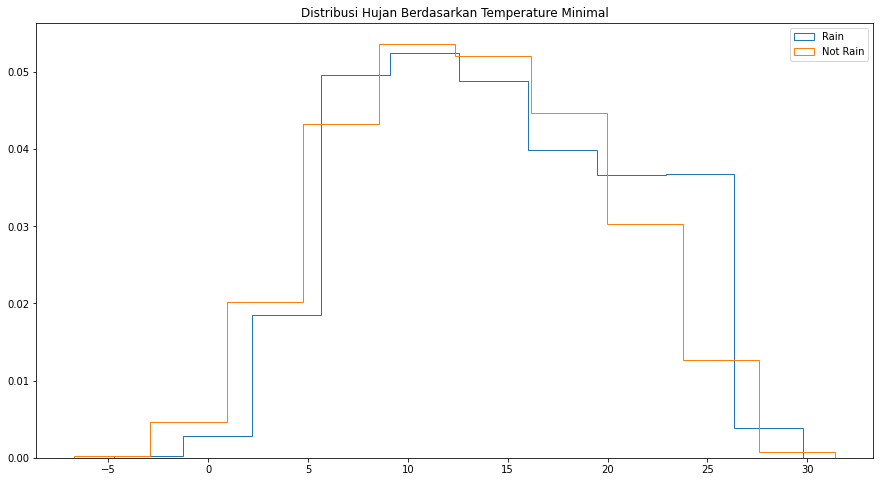

In [18]:
plt.figure(figsize=(15,8))
plt.hist(_df[_df['raintomorrow'] == 1].mintemp,
         histtype='step', label='Rain', density=True)
plt.hist(_df[_df['raintomorrow'] == 0].mintemp,
         histtype='step', label='Not Rain', density=True)
plt.legend()
plt.title('Distribusi Hujan Berdasarkan Temperature Minimal')


> Dilihat dari histogramnya, semakin rendah temperature maka kemugnkinan tidak akan turun hujan. Hal itu merupakan hal yang lumrah karena cuacanya sudah dingin (musim dingin). Jika temperaturnya berada pada angka yang tidak rendah maka ada kemugnkinan untuk hujan (pada temperature 20 s/d 25)

## Korelasi Kecepatan Angin Dengan Hujan

Text(0.5, 1.0, 'Distribusi Hujan Berdasarkan Kecepatan Arah Angin')

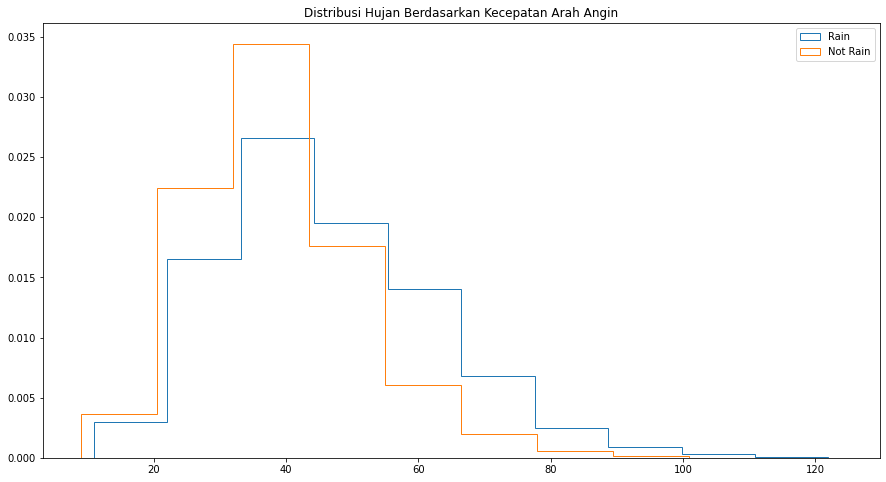

In [19]:
plt.figure(figsize=(15,8))
plt.hist(_df[_df['raintomorrow'] == 1].windgustspeed,
         histtype='step', label='Rain', density=True)
plt.hist(_df[_df['raintomorrow'] == 0].windgustspeed,
         histtype='step', label='Not Rain', density=True)
plt.legend()
plt.title('Distribusi Hujan Berdasarkan Kecepatan Arah Angin')


> Dilihat dari histogramnya, semakin besar kecepatan angin maka kemungkinan akan hujan.

## Korelasi Sinar Matahari Dengan Hujan

Text(0.5, 1.0, 'Distribusi Hujan Berdasarkan Sinar Matahari')

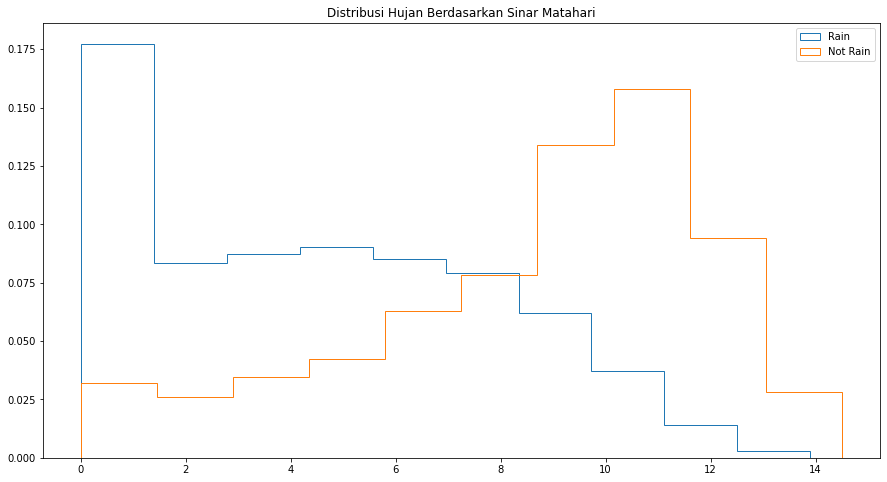

In [20]:
plt.figure(figsize=(15,8))
plt.hist(_df[_df['raintomorrow'] == 1].sunshine,
         histtype='step', label='Rain', density=True)
plt.hist(_df[_df['raintomorrow'] == 0].sunshine,
         histtype='step', label='Not Rain', density=True)
plt.legend()
plt.title('Distribusi Hujan Berdasarkan Sinar Matahari')


> Dilihat dari histogramnya, semakin tinggi intensitas matahari maka diprediksi tidak akan turun hujan. Artinya, cuacanya cerah.

## Korelasi Evaporasi Dengan Hujan

Text(0.5, 1.0, 'Distribusi Hujan Berdasarkan Evaporasi')

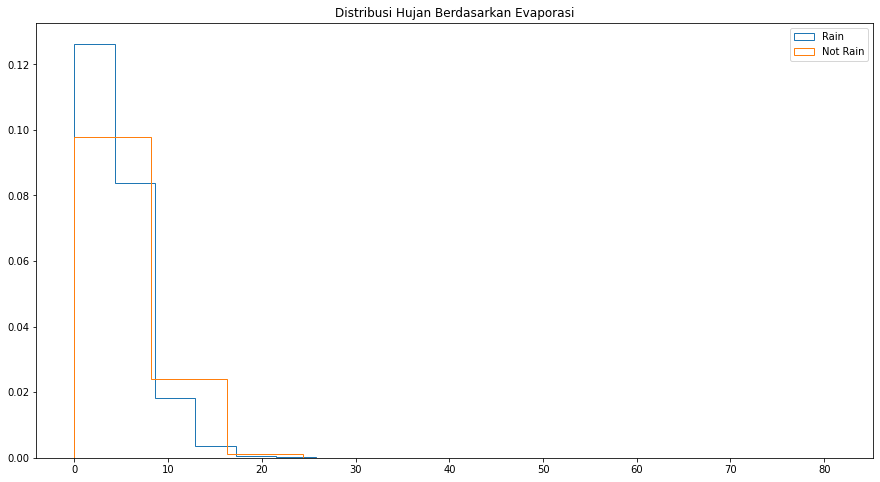

In [21]:
plt.figure(figsize=(15,8))
plt.hist(_df[_df['raintomorrow'] == 1].evaporation,
         histtype='step', label='Rain', density=True)
plt.hist(_df[_df['raintomorrow'] == 0].evaporation,
         histtype='step', label='Not Rain', density=True)
plt.legend()
plt.title('Distribusi Hujan Berdasarkan Evaporasi')


> dilihat dari histogramnya, evaporasi yang memungkinkan untuk terjadinya hujan berada pada angka 0-8.

## Korelasi Curah Hujan Dengan Prediksi Hujan

Text(0.5, 1.0, 'Distribusi Hujan Berdasarkan Curah Hujan')

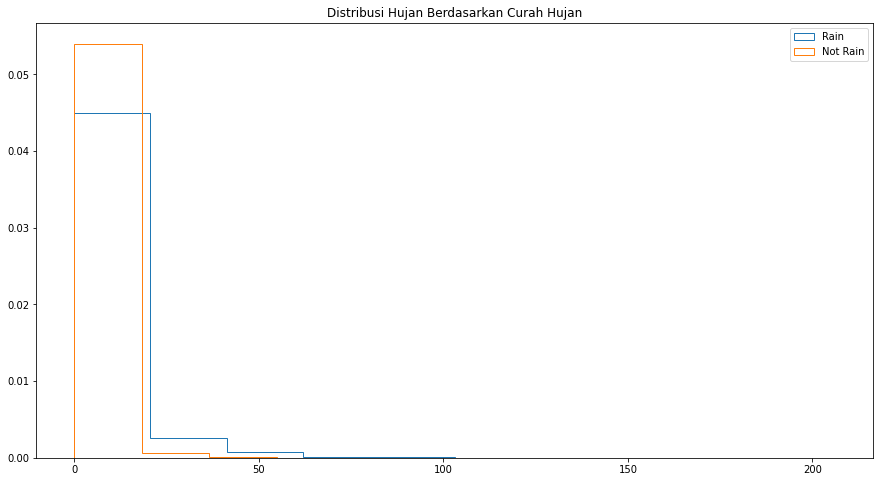

In [22]:
plt.figure(figsize=(15,8))
plt.hist(_df[_df['raintomorrow'] == 1].rainfall,
         histtype='step', label='Rain', density=True)
plt.hist(_df[_df['raintomorrow'] == 0].rainfall,
         histtype='step', label='Not Rain', density=True)
plt.legend()
plt.title('Distribusi Hujan Berdasarkan Curah Hujan')


> Dilihat dari distribusinya, semakin tinggi curah hujan maka kemugnkinan hujan semakin besar

## Cardinality

Melakukan cek pada tingkat kardinalitas kolom kategori untuk memaksimalkan model

In [23]:
df.info() #deteksi kolom yang tipenya object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           145460 non-null  datetime64[ns]
 1   location       145460 non-null  object        
 2   mintemp        143975 non-null  float64       
 3   maxtemp        144199 non-null  float64       
 4   rainfall       142199 non-null  float64       
 5   evaporation    82670 non-null   float64       
 6   sunshine       75625 non-null   float64       
 7   windgustdir    135134 non-null  object        
 8   windgustspeed  135197 non-null  float64       
 9   winddir9am     134894 non-null  object        
 10  winddir3pm     141232 non-null  object        
 11  windspeed9am   143693 non-null  float64       
 12  windspeed3pm   142398 non-null  float64       
 13  humidity9am    142806 non-null  float64       
 14  humidity3pm    140953 non-null  float64       
 15  

In [24]:
print('jumlah data yang unik pada kolom lokasi adalah : ',
      len(df.location.unique()))
print('jumlah data yang unik pada kolom arah mata angin adalah : ',
      len(df.windgustdir.unique()))


jumlah data yang unik pada kolom lokasi adalah :  49
jumlah data yang unik pada kolom arah mata angin adalah :  17


Kolom lokasi memiliki cardinality yang cukup tinggi. Berdasarkan sumber [disini](https://www.britannica.com/place/Australia), tiap2 lokasi bisa diwakilkan dengan arah mata anginnya. Hal tersebut merupakan hal yang masuk akal karena turunnya hujan bergantung pada arah angin. Maka, kolom lokasi `tidak independen` dan bisa diwakilkan oleh arah mata anginnya (windgustdir)

In [25]:
df['windgustdir'].replace({'NNE':  'NE', 'ENE': 'NE',
                           'SSE': 'SE', 'ESE': 'SE',
                           'SSW': 'SW', 'WSW': 'SW',
                           'WNW': 'NW', 'NNW': 'NW'
                           }, inplace=True)
#mengurangi kardinalitas

> Kardinalitas pada kolom windgustdir dikurangi dengan mengelompokkan arah mata angin menjadi lebih sederhana berdasarkan arah mata angin terdekatnya dan yang lebih lumrah diketahui oleh masyarakat umum. Pengelompokkan ini didasarkan pada 17 arah mata angin [disini](https://www.mdpi.com/applsci/applsci-11-07717/article_deploy/html/images/applsci-11-07717-g003.png). Dari 17 arah mata angin, akan dilakukan pengelompokan menjadi 8 arah mata angin

In [26]:
print('jumlah data yang unik pada kolom arah mata angin adalah : ',
      len(df.windgustdir.unique())) #masih terdapat NaN

jumlah data yang unik pada kolom arah mata angin adalah :  9


In [27]:
df.windgustdir.unique()

array(['W', 'NW', 'SW', 'NE', 'N', nan, 'SE', 'S', 'E'], dtype=object)

# 5. Data Prep

## Membuat Data Inference
Yaitu data yang dijadikan sample live untuk menguji model

In [28]:
df_inf = df.sample(5, random_state=17) #diambil sebanyak 5 sample
df_train_test = df.drop(df_inf.index)


In [29]:
df_train_test = df_train_test.reset_index(drop=True)
df_inf = df_inf.reset_index(drop=True)


In [30]:
df_train_test.dropna(subset=['raintomorrow'], inplace=True)
#karena kolom raintomomrrow akan dijadikan target, maka tidak boleh ada missing value
#tidak dilakukan imputasi missing value karena saya tidak menginginkan data yang di train berisi data ghaib
#hal ini dilakukan untuk menjaga model tetap akurat


In [31]:
#memisahkan kolom label dengan feature
X = df_train_test.drop('raintomorrow', axis=1)
y = df_train_test['raintomorrow']

In [32]:
df_train_test = df_train_test.reset_index(drop=True)
df_inf = df_inf.reset_index(drop=True)

## Split Data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


## Outliers
Handling outliers perlu dilakukan untuk meminimalisir nilai error pada model. Namun perlu dipastikan apakah data memiliki outliers/tidak

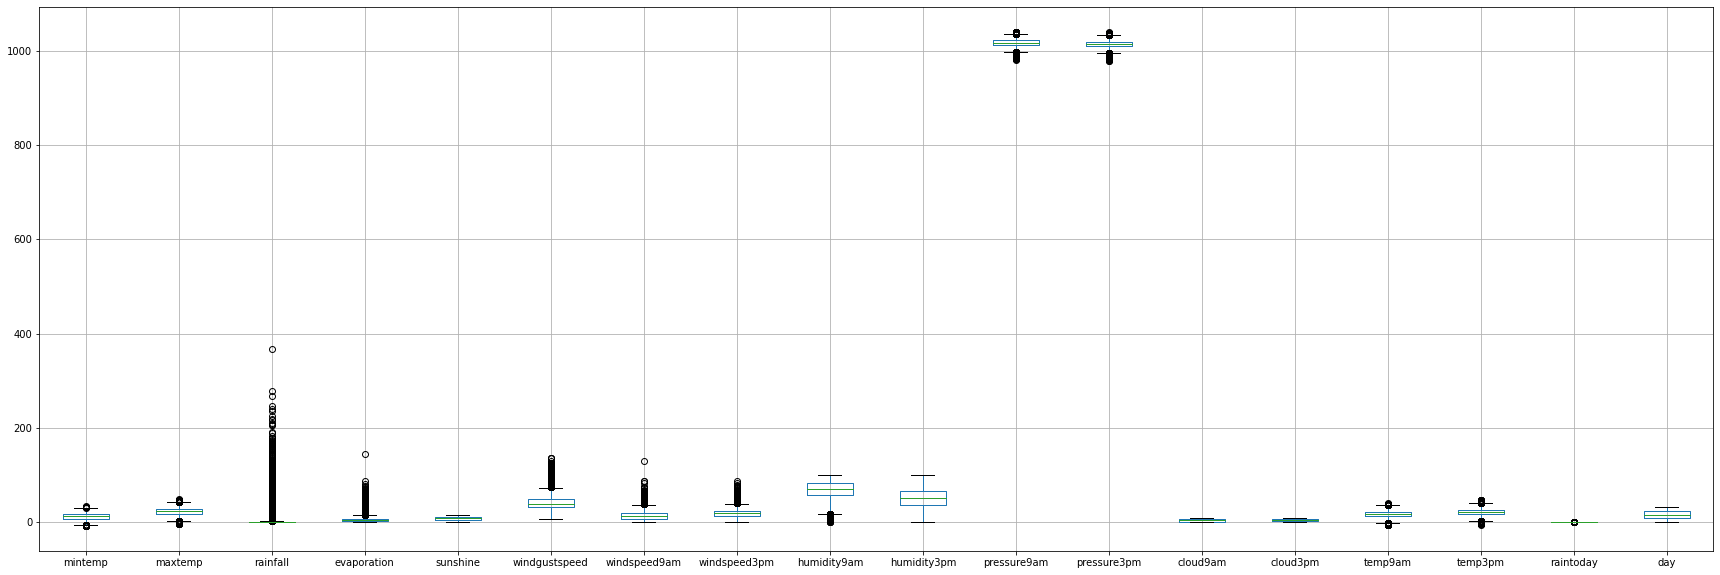

In [34]:
X_train.boxplot(figsize=(30, 10))
plt.show()


In [35]:
skew_Xtrain = X_train.skew() #menggunakan .skew() untuk melihat data outlier
skew_Xtrain


mintemp          0.019836
maxtemp          0.223955
rainfall         9.730160
evaporation      3.841938
sunshine        -0.502223
windgustspeed    0.873671
windspeed9am     0.781968
windspeed3pm     0.628182
humidity9am     -0.487870
humidity3pm      0.032889
pressure9am     -0.100416
pressure3pm     -0.047883
cloud9am        -0.227106
cloud3pm        -0.221259
temp9am          0.089551
temp3pm          0.242125
raintoday        1.363894
day              0.006458
month            0.030701
dtype: float64

> Data outliers adalah data yang memiliki nilai skew < -0.5 atau > 0.5. 

In [36]:
print(
    f'kolom yang kemungkinan memiliki outliers adalah \n {skew_Xtrain[skew_Xtrain.values>.5].index}{skew_Xtrain[skew_Xtrain.values<.5].index} ')


kolom yang kemungkinan memiliki outliers adalah 
 Index(['rainfall', 'evaporation', 'windgustspeed', 'windspeed9am',
       'windspeed3pm', 'raintoday'],
      dtype='object')Index(['mintemp', 'maxtemp', 'sunshine', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'day', 'month'],
      dtype='object') 


> Data yang skewnya extrim adalah evaporasi dan rainfall, maka kolom ini akan saya fokuskan outliernya

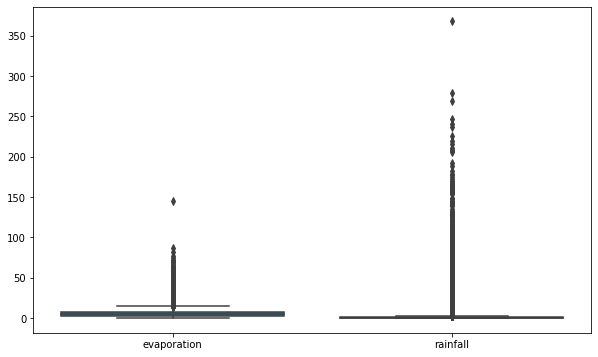

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train[['evaporation', 'rainfall']])


In [38]:
X_train[['rainfall']].value_counts()

rainfall
0.0         72960
0.2          7009
0.4          3051
0.6          2071
0.8          1652
            ...  
79.0            1
79.6            1
79.8            1
80.8            1
367.6           1
Length: 634, dtype: int64

> Data outliers pada kolom rainfall memiliki value 367 ketika value yang lain <100

berdasarkan perhitungan rainfall [disini](https://water.usgs.gov/edu/activity-howmuchrain-metric.html), setidaknya paling besar adalah 50mm. Namun dataset kali ini mencapai 371mm, menurut saya data tersebut bukanlah outlier karena dari definisinya [sumber data](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml) rainfall tersebut diukur selama 24 jam. Dimana berarti `371 mm` adalah curah uhjan selama 24 jam. Perjamnya curah hujannya adalah `371/24 = 15.45mm` saja.

Berdasarkan [sumber](https://www.kean.edu/~csmart/Hydrology/Lectures/Evaporation_pan.pdf), evaporasi adalah hasil perhitungan dari temperatur, kelembaban, angin, dan hal lainnya. Maka, meskipun memiliki outliers, kolom evaporasi tidak independen dan tidak cocok untuk dijadikan feature

## Missing Value

In [39]:
X_train.isna().sum() #melihat jumlah missing value pada tiap kolom


date                 0
location             0
mintemp           1168
maxtemp            986
rainfall          2562
evaporation      50196
sunshine         55822
windgustdir       8253
windgustspeed     8199
winddir9am        8449
winddir3pm        3337
windspeed9am      1399
windspeed3pm      2411
humidity9am       2114
humidity3pm       3593
pressure9am      12010
pressure3pm      11996
cloud9am         44738
cloud3pm         47472
temp9am           1388
temp3pm           2848
raintoday            0
day                  0
month                0
dtype: int64

In [40]:
X_train.rainfall.fillna(value=0, inplace=True)
X_train.raintoday.fillna(value=0,inplace=True)

> Nilai Rainfall = 0 (yang dianggap missing) bukanlah missing value, melainkan value dimana hasil observasi curah hujan nay adalah 0. Missing Values yang lain akan dilakukan dengan menggunakan pipeline

## Feature Engineering

In [41]:
month_ordinal = OrdinalEncoder(categories=[['5', '6', '7', '8', '9', '1', '2', '3', '4', '10', '11', '12']]) #diurutkan berdasarkan EDA dimana bulan dengan potensi hujan tertinggi terjadi pada bulan 5-8
wind_gust_dir_ordinal = OrdinalEncoder(categories=[['SW', 'NW', 'SE', 'NE', 'W', 'N', 'S', 'E']]) #diurutkan berdasarkan EDA dimana arah mata angin berpotensi untuk turun hujan
oe=OrdinalEncoder()

prep_pipeline = ColumnTransformer([
    ('month', month_ordinal, ['month']),
    ('raintoday',oe,['raintoday']),
    ('windgustdir', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', wind_gust_dir_ordinal)
    ]), ['windgustdir']),

    ('mean_imputer', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ]), ['mintemp', 'windgustspeed', 'pressure9am', 'temp3pm']), #data yang distribusinya normal, sehinggal dilakukan imputasi dengan mean

    ('median_imputer', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', MinMaxScaler())
    ]), ['sunshine', 'windspeed9am', 'humidity3pm', 'cloud3pm']),#data yang distribusinya skew, sehinggal dilakukan imputasi dengan median
])

> - Feature yang dipakai untuk model adalah raintoday, month, windgustdir, mintemp, windgustspeed, pressure9am, temp3pm, sunshine, windspeed9am, humidity3pm, cloud3pm.
> - Hanya diambil salah satu hasil observasi pada jam 9am/3pm, yang diambil adalah yang nilai correlationnya lebih tinggi (Lihat bagian EDA)


# 6. Model Definition

Dataset yang diprediksi adalah klasifikasi, maka model yang digunakan adalah model Logistic Regression dan LinearSVC. Pemilihan model SVM menggunakan LinearSVC karena berdasarkan [sumber](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) untuk dataset yang lebih besar disarankan menggunakan LinearSVC. Saya mempertimbangkan kesederhanaan dalam pembuatan model karena itu menggunakan LinearSVC (sama seperti SVC namun menggunakan kernel `linear`)

In [42]:
#Pipeline untuk Logistic Regression
pipe_log = Pipeline([
    ('pre', prep_pipeline),
    ('lr', LogisticRegression()
     )])

#Parameter Tuning untuk Logistic Regression
param_log = {
     'lr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
     'lr__C': [0.01, 1, 100],
     'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}




#Pipeline untuk model LinearSVC
pipe_svm = Pipeline([
    ('pre', prep_pipeline),
    ('svm', LinearSVC())
])

#Parameter untuk model LinearSVC
param_svm = {
    'svm__penalty': ['l1', 'l2'],
    'svm__C': [0.01, 0.1, 1]
}

In [43]:
#baseline model
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train, y_train)

DummyClassifier(random_state=42)

# 7. Model Training

## Logistic Regression Model

In [44]:
#Menggunakan GridSearchCV untuk menemukan fine tuning terbaik untuk model logistic regression
grid_log = GridSearchCV(pipe_log, param_log, cv=3, n_jobs=-1, verbose=True).fit(X_train, y_train); #2m

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [45]:
#melihat tuning terbaik yang digunakan oleh model
grid_log.best_params_

{'lr__C': 100, 'lr__penalty': 'l2', 'lr__solver': 'sag'}

> Hyperparameter untuk model LogisticRegression adalah :
> 1. C = 100
> 2. penalty = l2
> 3. solver = sag

In [46]:
#menggunakan pipeline dengan finetuning yang paling baik
log_best = grid_log.best_estimator_

## SVM Model

In [47]:
#Menggunakan GridSearchCV untuk menemukan fine tuning terbaik untuk model LinearSVC
grid_svc = GridSearchCV(pipe_svm, param_svm, cv=3, n_jobs=-1, verbose=True).fit(X_train, y_train);

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [48]:
#melihat finetuning terbaik yang digunakna oleh model LinearSVC
grid_svc.best_params_

{'svm__C': 1, 'svm__penalty': 'l2'}

> Hyperparameter untuk model LinearSVC adalah :
1. C = 1.0
2. Penalty = l2

In [49]:
#menggunakan pipeline terbaik untuk model LinearSVC
svc_best = grid_svc.best_estimator_

# 8.Model Evaluation

Evaluasi tiap model menggunakan pipeline terbaik dari masing-masing model

In [50]:
print('Training set score Logistic Regression: ' + str(log_best.score(X_train, y_train)))
print('Test set score Logistic Regression: ' + str(log_best.score(X_test, y_test)))

print('\nTraining set score SVC: ' + str(svc_best.score(X_train, y_train)))
print('Test set score SVC: ' + str(svc_best.score(X_test, y_test)))

Training set score Logistic Regression: 0.8412481523495239
Test set score Logistic Regression: 0.8381630057406071

Training set score SVC: 0.8406637791756901
Test set score SVC: 0.8367880100374686


Melihat classification report dari model yang di training

In [51]:
print('Logistic Regression\n',classification_report(y_test, log_best.predict(X_test)))
print('\nLinear SVC\n', classification_report(y_test, svc_best.predict(X_test)))
print('\nDummy Baseline\n', classification_report(y_test, baseline.predict(X_test)))

Logistic Regression
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     22716
           1       0.70      0.46      0.56      6375

    accuracy                           0.84     29091
   macro avg       0.78      0.70      0.73     29091
weighted avg       0.83      0.84      0.83     29091


Linear SVC
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22716
           1       0.71      0.44      0.54      6375

    accuracy                           0.84     29091
   macro avg       0.78      0.69      0.72     29091
weighted avg       0.82      0.84      0.82     29091


Dummy Baseline
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     22716
           1       0.00      0.00      0.00      6375

    accuracy                           0.78     29091
   macro avg       0.39      0.50      0.44     29091
weighted avg       0.61

 > 1. Akurasi bernilai 84 terlihat bagus, namun angka ini adalah BIAS karena data antara hujan/tidak tidak seimbang (imbalance)
 > 2.  Model yang dibuat tidak dapat memprediksi hujan (1) dengan baik. Hal ini dapat dilihat dari nilai `f1-score` pada kelas 1, hal ini terjadi karena data imbalance sehingga model kekurangan data untuk training.
 > 3. Model LogisticRegression mneghasilkan result lebih baik karena nilai precision, f1score, dan akurasinya lebih tinggi
 > 4. Dalam prediksi hujan / tidak, sebaiknya difokuskan untuk memaksimalkan nilai `recall` karena lebih baik nilai `actualnya tidak hujan` namun `terprediksi hujan` agar kita lebih bersiap-siap mengahdapi hujan di hari esok.

In [52]:
#Komparasi Model pada TEST set
logreg = grid_log.score(X_test, y_test)
svc = grid_svc.score(X_test, y_test)

print('Skor Dengan Model Logistic Regression ',round(logreg,2))
print('Skor Dengan Model LinearSVC ',round(svc,2))

Skor Dengan Model Logistic Regression  0.84
Skor Dengan Model LinearSVC  0.84


In [53]:
#melihat confusion matrix untuk model logistic regression
log_confusion = confusion_matrix(y_test, log_best.predict(X_test))
log_confusion

array([[21446,  1270],
       [ 3438,  2937]])

> Model Logistic Regression memprediksi 21446 + 2937 data yang benar, dan 3438 + 2937 data yang salah. 

In [54]:
svc_confusion = confusion_matrix(y_test, svc_best.predict(X_test))
svc_confusion

array([[21549,  1167],
       [ 3581,  2794]])

> Model Linear SVC berhasil memprediksi 21549 + 2749 data yang benar, dan 1167 + 2794 data yang salah prediksi

Nilai ROC AUC Score untuk LinearSVC Test

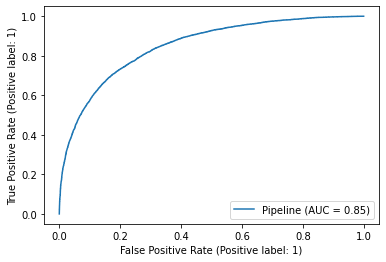

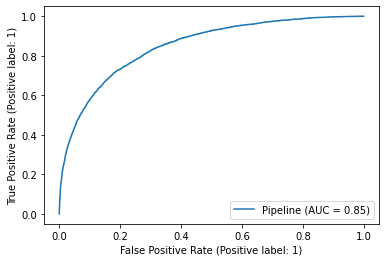

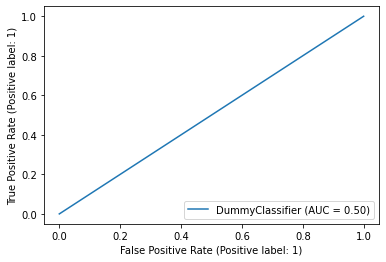

In [55]:
plt.show(plot_roc_curve(svc_best, X_test, y_test))
plt.show(plot_roc_curve(log_best, X_test, y_test))
plt.show(plot_roc_curve(baseline, X_test, y_test))

> -  Hasil ROC AUC Score pada model Logistic Regression & LinearSVC tidak berbeda karena sama-sama menghasilkan nilai 0.85
> - Model yang dipakai sudah lebih baik daripada baseline dumym

# 9. Model Inference
Menguji model menggunakan data inference (df_inf)

In [56]:
#prediksi data inference dengan LogisticRegression
inf_pred_log = log_best.predict(df_inf)
inf_pred_df_log = pd.DataFrame(inf_pred_log, columns=['prediksi_hujan_besok_log'])
inf_pred_df_log

,prediksi_hujan_besok_log
0,1
1,0
2,1
3,0
4,0


In [57]:
#prediksi data inference dengan model LinearSVC
inf_pred_svc = svc_best.predict(df_inf)
inf_pred_df_svc = pd.DataFrame(inf_pred_svc, columns=['prediksi_hujan_besok_svc'])
inf_pred_df_svc

,prediksi_hujan_besok_svc
0,1
1,0
2,1
3,0
4,0


In [58]:
df_inf_pred = pd.concat([inf_pred_df_log ,inf_pred_df_svc ], axis=1)

In [59]:
pd.concat([df_inf, df_inf_pred], axis=1)

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,day,month,prediksi_hujan_besok_log,prediksi_hujan_besok_svc
0,2016-05-24,NorfolkIsland,15.9,21.9,0.6,4.6,NaN,W,54.0,W,WNW,24.0,22.0,61.0,75.0,1013.6,1010.4,NaN,8.0,20.9,20.3,0,1,24,5,1,1
1,2015-11-24,Woomera,14.2,34.4,0.0,9.4,NaN,NW,37.0,ESE,W,17.0,9.0,38.0,9.0,1017.9,1013.3,0.0,0.0,21.8,32.3,0,0,24,11,0,0
2,2008-07-31,Adelaide,7.6,19.3,0.8,1.8,5.0,W,69.0,NNE,NW,17.0,20.0,56.0,52.0,1006.8,1005.2,NaN,NaN,14.4,18.1,0,1,31,7,1,1
3,2016-06-07,Brisbane,10.4,22.4,0.0,3.2,9.8,W,35.0,WNW,W,7.0,15.0,50.0,33.0,1012.5,1008.7,0.0,1.0,17.3,22.0,0,0,7,6,0,0
4,2016-07-27,Watsonia,7.1,12.1,0.6,2.0,1.9,W,41.0,WSW,W,15.0,20.0,100.0,55.0,1012.7,1017.4,7.0,6.0,9.3,11.7,0,0,27,7,0,0


> 1 = Hujan , 0 = Tidak Hujan

# 10. Kesimpulan

## Overall Data
- Data yang digunakan tidak seimbang, terlalu banyak data yang memprediksi `tidak hujan` . 
- Banyak missing value pada data yang dihandle dengan imputasi mean, median, dan modus. 
- Tidak ditemukan outliers pada dataset kali ini
- Fitur yang digunakan pada model ini adalah fitur yang memiliki korelasi baik dengan raintomorrow yaitu  raintoday, month, windgustdir, mintemp, windgustspeed, pressure9am, temp3pm, sunshine, windspeed9am, humidity3pm, cloud3pm.

## Model Yang Digunakan
Model yang digunakan kali ini adalah :
> LogisticRegression dengan Hyperparameter 
> - C = 100
> - penalty = l2
> - solver = sag

> LinearSVC dengan Hyperparameter
> - C = 1.0
> - Penalty = l2

## Model Result
> Kedua model agak sedikit overfit
> Model yang dibuat tidak dapat memprediksi hujan dengan baik karena data yang didapatkan imbalance (kebanyakan data menunjukkan tidak hujan)

> Logistic Regression :
- Training set score Logistic Regression: 0.8412481523495239
- Test set score Logistic Regression: 0.8381630057406071

> LinearSVC : 
- Training set score SVC: 0.8406637791756901
- Test set score SVC: 0.8367880100374686

## Best Model
Model yang baik untuk memprediksi hujan/tidak di hari esok adalah model **Logistic Regression** dengan beberapa alasan : 
> Pada model kali ini, lebih baik memaksimalkan pada nilai `recall`
> Antara LinearSVC dan LogisticRegression, classificationreport menghasilkan nilai lebih bagus pada model LogisticRegression pada nilai recall & f1score



